In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


Reading train.csv as a dataframe

In [2]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

*There are 42000 rows and 785 column. Each image has 28*28 pixecl[2D] here it is converted to 1D therefore 784 columns(input features) and 1 output feature *

In [5]:
import matplotlib.pyplot as plt

printing an image view of the pixels of a given image. Here we need to access all the columns for a row to get the pixel values(28*28=784) of an image 

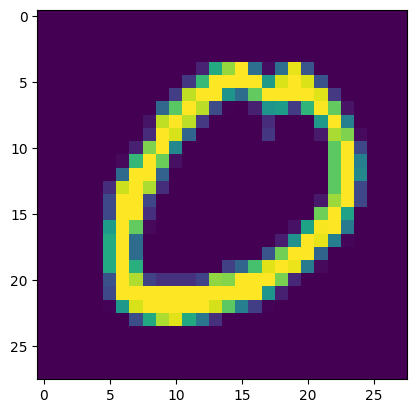

In [6]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

Separating X and y from the train.csv for furthur processing

In [7]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

*Separating training and testing dataset using train_test_split method*

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(33600, 784)

importing KNN classifier for demonstarting PCA

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn=KNeighborsClassifier()

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Applying KNN without preprocessing- standardization, normalization**

In [13]:
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

13.955495357513428


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9648809523809524

In [15]:
accuracy_score(y_test,y_pred)

0.9648809523809524

**Applying PCA-Principle component analysis**

In [16]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

**Step -1 in PCA**

*Apptying standard scalar for Mean Centering*

In [17]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100) # none signofies that the number of principle component will be equal to number of feature in the dataset

*We are finding eigen value and eigen vector using fit_transform method of PCA*

In [27]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [28]:
X_train_trf.shape

(33600, 2)

In [21]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [22]:
y_pred_pca=knn.predict(X_test_trf)

In [23]:
accuracy_score(y_pred_pca,y_test)

0.9546428571428571

In [24]:
acc=[]
for i in range(1,785):
    pca=pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred_pca=knn.predict(X_test_trf)
    temp=accuracy_score(y_pred_pca,y_test)
    print(temp)
    acc.append(temp)
    
#print(acc.max())

0.25821428571428573
0.32404761904761903
0.5101190476190476
0.6661904761904762
0.7379761904761905
0.8227380952380953
0.843452380952381
0.8722619047619048
0.8867857142857143
0.9053571428571429
0.911547619047619
0.9184523809523809
0.9278571428571428
0.935
0.9383333333333334
0.9379761904761905
0.9398809523809524
0.9402380952380952
0.9419047619047619
0.9439285714285715
0.9433333333333334
0.9434523809523809
0.9446428571428571
0.9447619047619048
0.9485714285714286
0.9479761904761905
0.9480952380952381
0.9470238095238095
0.9483333333333334
0.9498809523809524
0.9508333333333333
0.9520238095238095
0.9497619047619048
0.950595238095238
0.9507142857142857
0.9519047619047619
0.9526190476190476
0.9517857142857142
0.9516666666666667
0.9521428571428572
0.9530952380952381
0.9528571428571428
0.9525
0.9519047619047619
0.9536904761904762
0.9534523809523809
0.9548809523809524
0.9530952380952381
0.954047619047619
0.9544047619047619
0.9530952380952381
0.9545238095238096
0.9546428571428571
0.9545238095238096
0

KeyboardInterrupt: 

In [57]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [49]:
import plotly.express as px

y_train_trf=y_train.astype('str')

fig=px.scatter(x=X_train_trf[:,0],
               y=X_train_trf[:,1],
              color=y_train_trf,
              color_discrete_sequence=px.colors.qualitative.G10
              )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [44]:
X_train_trf

array([[-2.7186417 , -0.48984098],
       [-0.67700814, -6.75399242],
       [-3.03319131,  6.50981297],
       ...,
       [ 2.14881971,  0.78070423],
       [ 1.05957015,  0.94792956],
       [17.70257252,  1.96172305]])

In [47]:
import plotly.express as px

y_train_trf=y_train.astype('str')

fig=px.scatter_3d(df,x=X_train_trf[:,0],
                  y=X_train_trf[:,1],
                  z=X_train_trf[:,2],
              color=y_train_trf,
              )
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [58]:
pca.explained_variance_ # this is eigen values(lambda)

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [60]:
np.cumsum(pca.explained_variance_ratio_) # gives the corresponding ratio to the variance explanation

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

In [54]:
pca.components_

array([[ 1.03791717e-18,  3.48503024e-18,  2.59355289e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.63684438e-17, -1.06069504e-17, -6.36010329e-20, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.80181351e-17, -1.59651446e-17, -8.71459211e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [55]:
pca.components_.shape

(3, 784)

There are 3 eigen vectors(three PC's). Each vector has 784 components as there were 784 input features in the dataset

**Finding out the optimum number of principle components required**

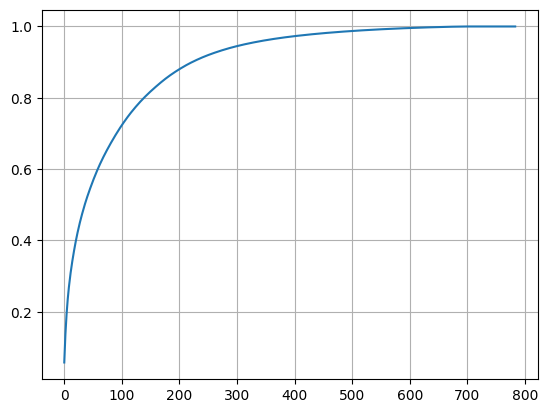

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

around 200 in x-axis we are getting 90 percent variance

**Scenarios when PCA doesn't work**
* when data is aligned in circluar shape
* 